## Challenge

As mentioned in the Compass, we will be using data from international football (soccer :)) matches that took place between 1872 and 2019 (148 years). You can download the dataset from [**this link**](https://drive.google.com/file/d/1cCn5botBKzh1XZOvrxpcLle-Ua7Fh9BR/view?usp=sharing) and find more information about it on [**Kaggle**](https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017).

We need to make sure we understand all variables and information they store before we start working on the task. It's very important to understand the dataset to create meaningful visualizations.

> #### Instruction
> Use visualizations to answer following questions. Try different Python packages.

In [30]:
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets.widgets import interact, interact_manual

import plotly.graph_objects as go

In [4]:
football = pd.read_csv('results.csv',parse_dates=['date'])
football.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [5]:
football.value_counts('tournament')

tournament
Friendly                                17029
FIFA World Cup qualification             7236
UEFA Euro qualification                  2582
African Cup of Nations qualification     1672
FIFA World Cup                            900
                                        ...  
OSN Cup                                     4
Dragon Cup                                  4
AFF Championship qualification              2
Atlantic Heritage Cup                       2
Copa América qualification                  2
Length: 112, dtype: int64

## Task
Which teams scored the largest number of goals in FIFA World Cup?

In [6]:
fifa_world_cup = football[football.tournament == 'FIFA World Cup']
fifa_world_cup.head(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
1304,1930-07-13,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True
1305,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True


In [7]:
# group by home team and sum home_score to get total home game goals
# group by away team and sum away_score to get total away game goals
# create new dataframe from home goals and away goals

home_goals = fifa_world_cup.groupby('home_team')['home_score'].sum()
away_goals = fifa_world_cup.groupby('away_team')['away_score'].sum()
home_and_away = pd.DataFrame([home_goals,away_goals]).T
home_and_away['total_goals'] = home_and_away['home_score'] + home_and_away['away_score']
fifa_world_cup_top_10 = home_and_away.sort_values(by=['total_goals'],ascending=False).head(10)
fifa_world_cup_top_10

,home_score,away_score,total_goals
Brazil,177.0,52.0,229.0
Germany,158.0,68.0,226.0
Argentina,114.0,23.0,137.0
Italy,72.0,56.0,128.0
France,85.0,35.0,120.0
Spain,49.0,50.0,99.0
England,50.0,41.0,91.0
Uruguay,31.0,56.0,87.0
Hungary,49.0,38.0,87.0
Netherlands,42.0,44.0,86.0


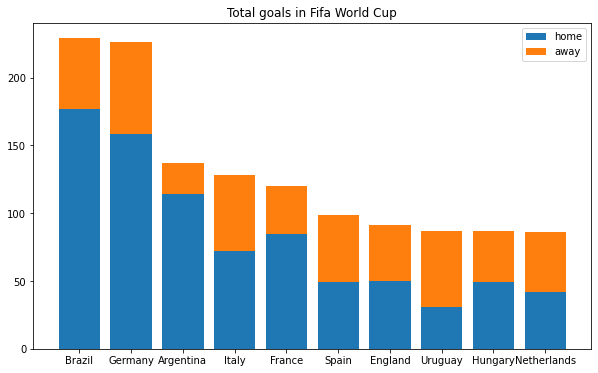

In [8]:
fig, ax = plt.subplots(figsize=(10,6))

ax.bar(fifa_world_cup_top_10.index, fifa_world_cup_top_10.home_score, label='home')
ax.bar(fifa_world_cup_top_10.index, fifa_world_cup_top_10.away_score, label='away', bottom=fifa_world_cup_top_10.home_score)
ax.set_title('Total goals in Fifa World Cup')
ax.legend()
plt.show()

## Task
What is the number of matches played in each tournament throughout history?

In [9]:
#get top ten tournaments
football.value_counts('tournament')[1:11]

tournament
FIFA World Cup qualification            7236
UEFA Euro qualification                 2582
African Cup of Nations qualification    1672
FIFA World Cup                           900
Copa América                             813
AFC Asian Cup qualification              724
African Cup of Nations                   690
CECAFA Cup                               620
CFU Caribbean Cup qualification          606
British Championship                     505
dtype: int64

In [10]:
football['year'] = football.date.dt.year
tourn_total_games=football.groupby(by=['year','tournament'])['home_team'].count().reset_index()
tourn_total_games

,year,tournament,home_team
0,1872,Friendly,1
1,1873,Friendly,1
2,1874,Friendly,1
3,1875,Friendly,1
4,1876,Friendly,2
...,...,...,...
1499,2019,Intercontinental Cup,7
1500,2019,Pacific Games,22
1501,2019,UEFA Euro qualification,250
1502,2019,UEFA Nations League,4


In [11]:
# filter function
def filter_df(tournament):
    return tourn_total_games[tourn_total_games['tournament'] == tournament ]

filter_widget = widgets.interact(filter_df,
                                 tournament=tourn_total_games['tournament'].unique(),
                                 )


interactive(children=(Dropdown(description='tournament', options=('Friendly', 'British Championship', 'Copa Li…

In [12]:
@interact
def line_plot(tournament=list(tourn_total_games.tournament.unique())):

    # trace
    trace = [go.Scatter(x=tourn_total_games[tourn_total_games['tournament'] == tournament]['year'], y=tourn_total_games[tourn_total_games['tournament'] == tournament]['home_team'], mode='lines',name=tournament)]

    # layout
    layout = go.Layout(
                title = 'Total games in tournament', # Graph title
                xaxis = dict(title = tournament.title()), # x-axis label
                
                hovermode ='closest' # handles multiple points landing on the same vertical
    )

    # fig
    fig = go.Figure(trace, layout)
    fig.show()

interactive(children=(Dropdown(description='tournament', options=('Friendly', 'British Championship', 'Copa Li…

## Task 
Show the trend in number of matches per year.

In [13]:
# see above

## Task
Which teams are the most successful ones? (winning percentage)

In [14]:
football.head(5)


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876


In [15]:
# make new column with the winning team (if home_score>away_score: winner = home_team
def f(row):
    if row['home_score'] >= row['away_score']:
        val = row['home_team']
    elif row['home_score'] <= row['away_score']:
        val = row['away_team']
    else:
        val = 'tie'
    return val

football['winner'] = football.apply(f, axis=1)
football


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,winner
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,Scotland
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,England
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,Scotland
...,...,...,...,...,...,...,...,...,...,...,...
41581,2020-01-10,Barbados,Canada,1,4,Friendly,Irvine,United States,True,2020,Canada
41582,2020-01-12,Kosovo,Sweden,0,1,Friendly,Doha,Qatar,True,2020,Sweden
41583,2020-01-15,Canada,Iceland,0,1,Friendly,Irvine,United States,True,2020,Iceland
41584,2020-01-19,El Salvador,Iceland,0,1,Friendly,Carson,United States,True,2020,Iceland


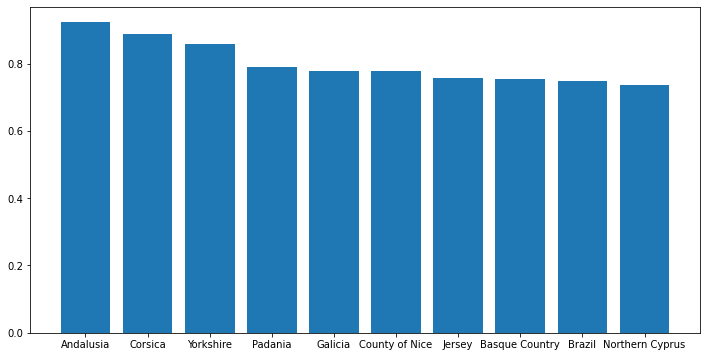

In [16]:
wins = football.groupby('winner').size()
total_games = football.groupby('home_team').size() + football.groupby('away_team').size()
win_percent = wins / total_games
win_percent_sorted = win_percent.sort_values(ascending=False)


fig, ax = plt.subplots(figsize=(12,6))
ax.bar(win_percent_sorted.head(10).index, win_percent_sorted.head(10))
plt.show()

## Task
Which teams are the least successful ones? (winning percentage)

In [17]:
wins = football.groupby('winner').size()
total_games = football.groupby('home_team').size() + football.groupby('away_team').size()
win_percent = wins / total_games

win_percent_sorted = win_percent.sort_values()

win_percent_sorted


San Marino           0.018405
Tibet                0.076923
Anguilla             0.081967
Kiribati             0.090909
East Timor           0.098039
                       ...   
Sark                      NaN
Silesia                   NaN
Surrey                    NaN
Two Sicilies              NaN
Western Australia         NaN
Length: 312, dtype: float64

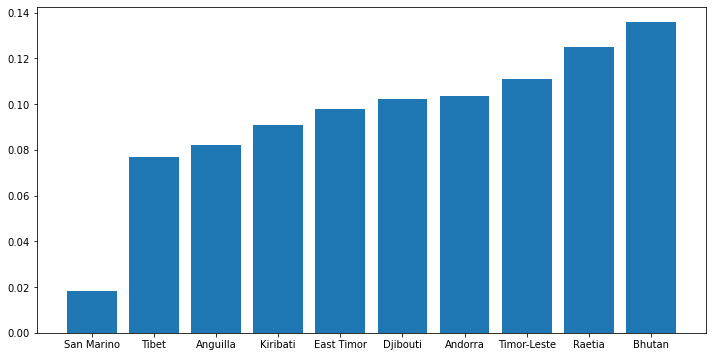

In [18]:
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(win_percent_sorted.head(10).index, win_percent_sorted.head(10))
plt.show()

## Task
Which months through the history had more matches? Is it June, July, or others? Does the number of matches change from month to month?

In [19]:
football['month'] = football['date'].dt.month
games_by_month = football.groupby('month').size().sort_values(ascending=False)

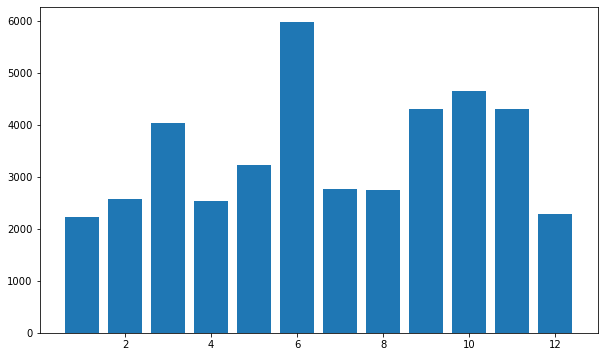

In [20]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(games_by_month.index, games_by_month)
plt.show()

## Task
Which teams played against each other the most?

In [22]:
def pair(row):
    pair = sorted([row['home_team'], row['away_team']])
    return str(pair)
    
football['pair'] = football.apply(pair, axis=1)
football

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,winner,month,pair
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,Scotland,11,"['England', 'Scotland']"
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,England,3,"['England', 'Scotland']"
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,Scotland,3,"['England', 'Scotland']"
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,England,3,"['England', 'Scotland']"
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,Scotland,3,"['England', 'Scotland']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41581,2020-01-10,Barbados,Canada,1,4,Friendly,Irvine,United States,True,2020,Canada,1,"['Barbados', 'Canada']"
41582,2020-01-12,Kosovo,Sweden,0,1,Friendly,Doha,Qatar,True,2020,Sweden,1,"['Kosovo', 'Sweden']"
41583,2020-01-15,Canada,Iceland,0,1,Friendly,Irvine,United States,True,2020,Iceland,1,"['Canada', 'Iceland']"
41584,2020-01-19,El Salvador,Iceland,0,1,Friendly,Carson,United States,True,2020,Iceland,1,"['El Salvador', 'Iceland']"


In [27]:
top_pairs = football.groupby('pair').size().sort_values(ascending=False)
top_pairs.head(20)

pair
['Argentina', 'Uruguay']            176
['Austria', 'Hungary']              133
['Belgium', 'Netherlands']          125
['England', 'Scotland']             116
['Kenya', 'Uganda']                 107
['Norway', 'Sweden']                107
['Scotland', 'Wales']               106
['Denmark', 'Sweden']               106
['Argentina', 'Brazil']             104
['England', 'Wales']                103
['Argentina', 'Paraguay']           101
['England', 'Northern Ireland']      99
['Northern Ireland', 'Scotland']     95
['Northern Ireland', 'Wales']        94
['Finland', 'Sweden']                89
['Argentina', 'Chile']               88
['Denmark', 'Norway']                85
['Chile', 'Peru']                    79
['Brazil', 'Paraguay']               78
['Chile', 'Uruguay']                 78
dtype: int64

## Task
Apply your creativity to show some additional insights from the data.

In [32]:
games_per_city = football.groupby('city').size().sort_values(ascending=False)
games_per_city_top10 = games_per_city.head(10)

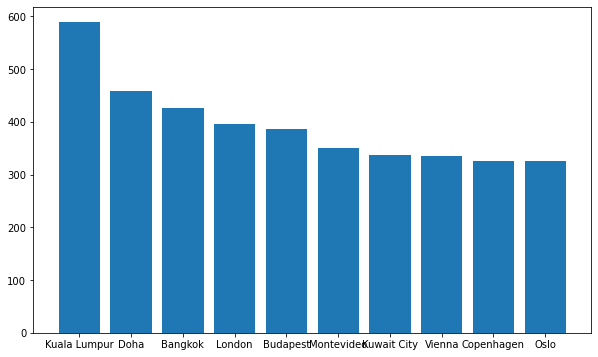

In [33]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(games_per_city_top10.index, games_per_city_top10)
plt.show()

## Task (Stretch)
Create these graphs in Tableau as well.